In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'piePlotExam'

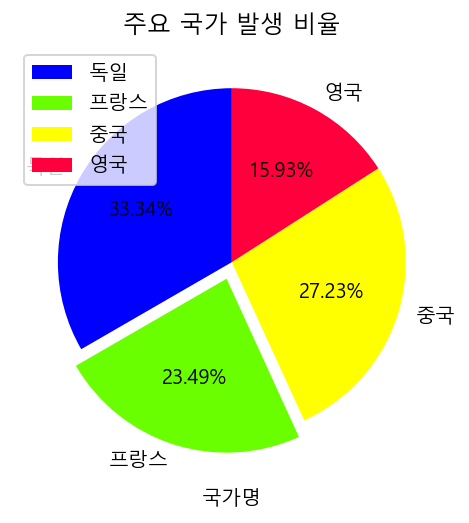

In [9]:
data = pd.read_csv('covid_data.csv', index_col='국가')
data = data.loc[['독일','프랑스','중국','영국']]
chartdata = data['4월06일']
mylabel = chartdata.index

mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']
plt.figure()
plt.pie(chartdata, labels=mylabel, shadow=False, explode=(0, 0.1, 0, 0),colors=mycolors, autopct='%.2f%%', startangle=90)
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('국가명')
plt.title('주요 국가 발생 비율')

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

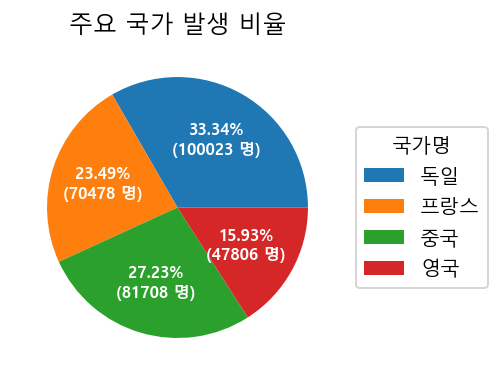

In [15]:
def getLabelFormat(pct, allvals):
    absolute = int(pct/100*np.sum(allvals))
    return '{:.2f}%\n({:d} 명)'.format(pct, absolute)

fig, ax = plt.subplots(figsize=(6,3), subplot_kw=dict(aspect='auto'))

wedges, texts, autotexts = ax.pie(chartdata, autopct=lambda pct : getLabelFormat(pct, chartdata), textprops=dict(color='w'))

ax.legend(wedges, mylabel, title='국가명', loc='center', bbox_to_anchor=(1,0,0.5,1))  # x, y, width, height

plt.setp(autotexts, size=8, weight='bold')
ax.set_title('주요 국가 발생 비율')

savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

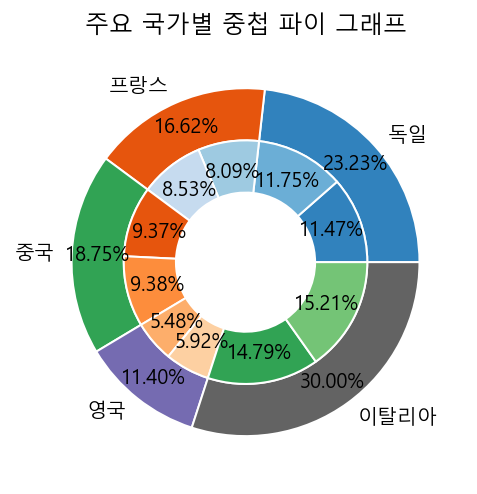

In [23]:
data = pd.read_csv('covid_data.csv', index_col='국가')
data = data.loc[['독일','프랑스','중국','영국', '이탈리아']]
filtered_data = data[['4월06일', '4월07일']]

totallist = []
for key in filtered_data.index.values:
    imsi = filtered_data.loc[key].values
    totallist.append([item for item in imsi])
chartdata = np.array(totallist)

color_su = 5
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.arange(color_su)*4)
inner_colors = cmap(np.arange(color_su * 2))
cum_sum = chartdata.sum(axis=1)

INNER_VACANT_CIRCLE_SIZE = 0.3
OUTER_OPCDISTANCE = 0.85
INNER_PCTDISTANCE = 0.75

fig, ax = plt.subplots()
ax.pie(cum_sum, radius=1, colors=outer_colors, wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
      labels=['독일','프랑스','중국','영국', '이탈리아'], autopct='%.2f%%', pctdistance=OUTER_OPCDISTANCE)

ax.pie(chartdata.flatten(), radius=1 - INNER_VACANT_CIRCLE_SIZE, colors=inner_colors, 
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       autopct='%.2f%%', pctdistance=INNER_PCTDISTANCE)

ax.set(aspect='equal', title='주요 국가별 중첩 파이 그래프')

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

Text(0.5, 1.0, 'rectangular box plot')

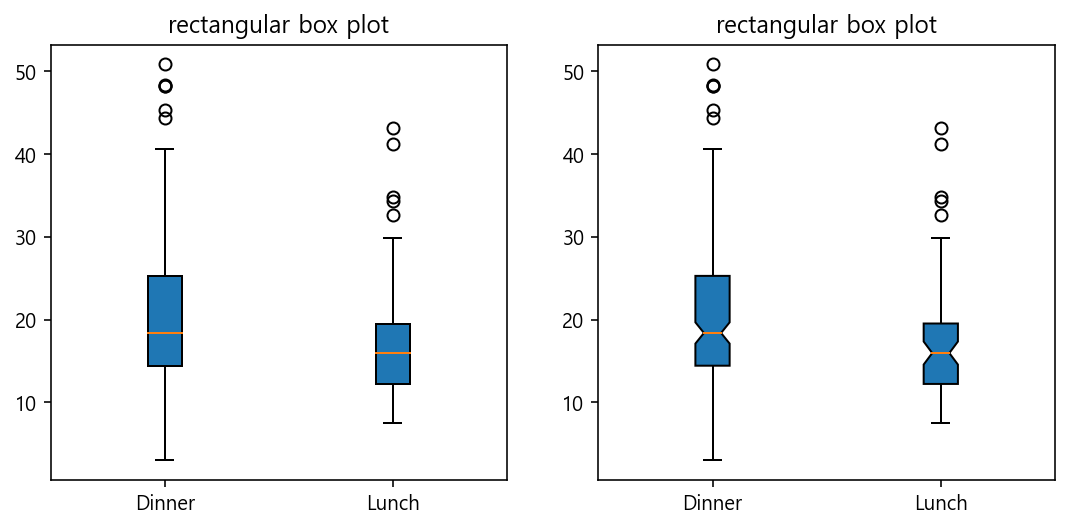

In [28]:
myframe = pd.read_csv('tips.csv', encoding='utf-8', index_col=0)

DINNER, LUNCH = 'Dinner', 'Lunch'
frame01 = myframe.loc[myframe['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER
frame02 = myframe.loc[myframe['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH

chartdata = [np.array(frame01),np.array(frame02)]
xtick_label = [DINNER, LUNCH]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

ax1.boxplot(chartdata,
            vert=True,
            patch_artist=True,
            labels=xtick_label)
ax1.set_title('rectangular box plot')

ax2.boxplot(chartdata,
            notch=True,
            vert=True,
            patch_artist=True,
            labels=xtick_label)
ax2.set_title('rectangular box plot')

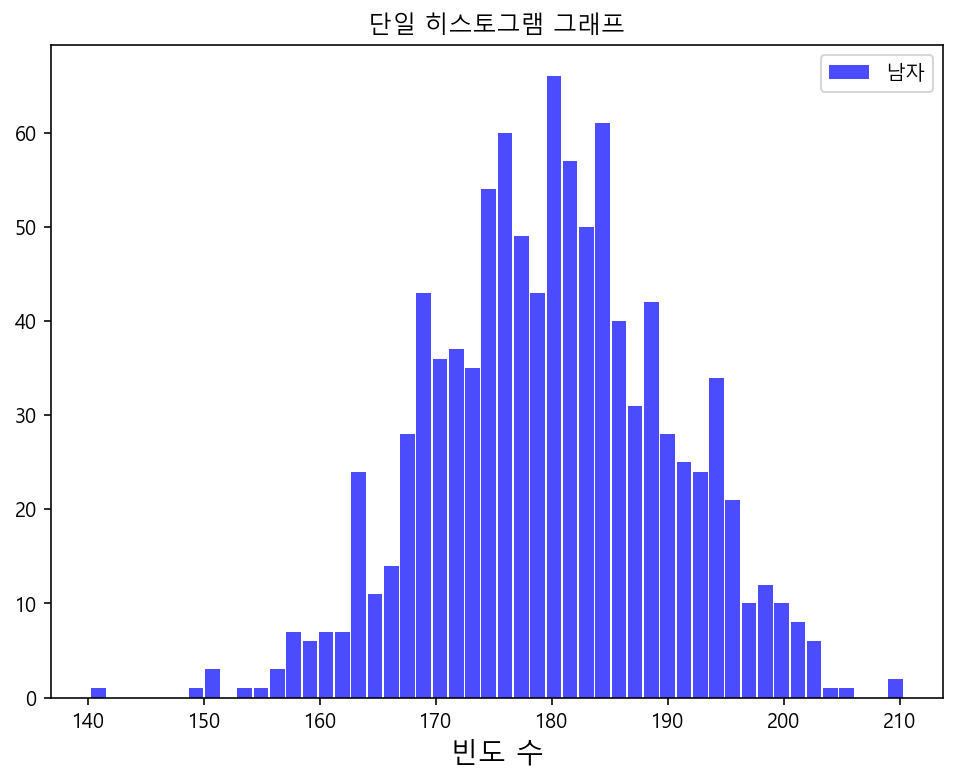

In [33]:
CHART_NAME = 'histogramPlotExam'
num_bins=50

human = pd.read_csv('human_height.csv')
man = human.man
woman = human.woman

plt.figure(figsize=(8,6))
plt.hist(man, bins=num_bins, alpha=0.7, facecolor='b', label='남자', rwidth=0.9)
plt.xlabel('키', size=14)
plt.xlabel('빈도 수', size=14)
plt.title('단일 히스토그램 그래프')
plt.legend(loc='upper right')

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

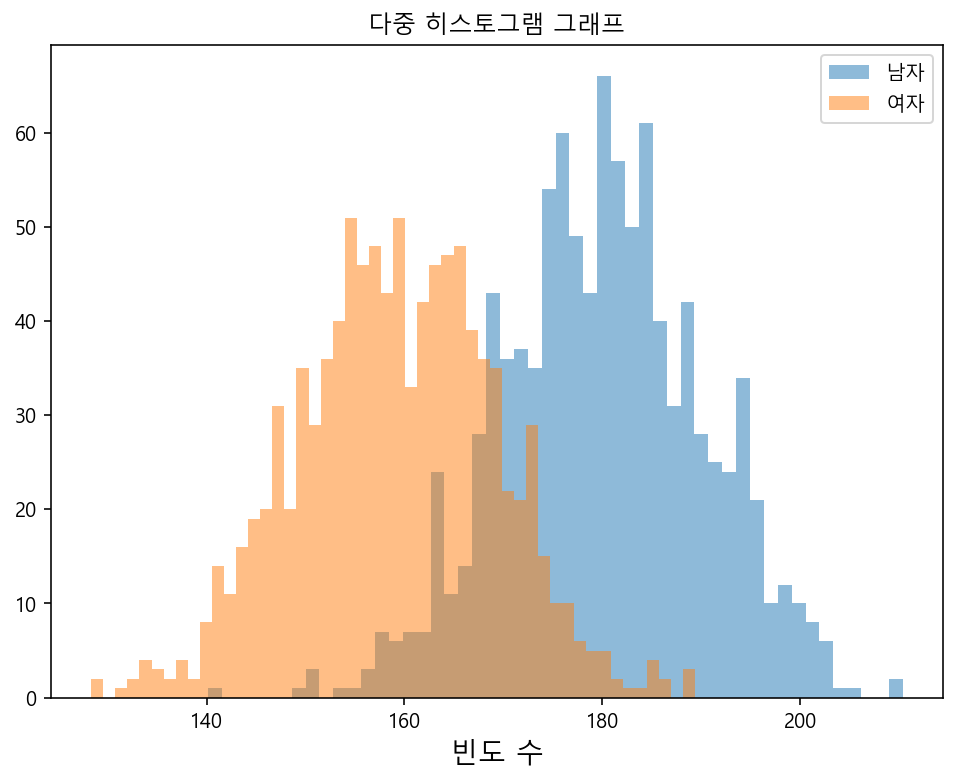

In [35]:
plt.figure(figsize=(8,6))
plt.hist(man, bins=num_bins, alpha=0.5, label='남자')
plt.hist(woman, bins=num_bins, alpha=0.5, label='여자')
plt.xlabel('키', size=14)
plt.xlabel('빈도 수', size=14)
plt.title('다중 히스토그램 그래프')
plt.legend(loc='upper right')

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

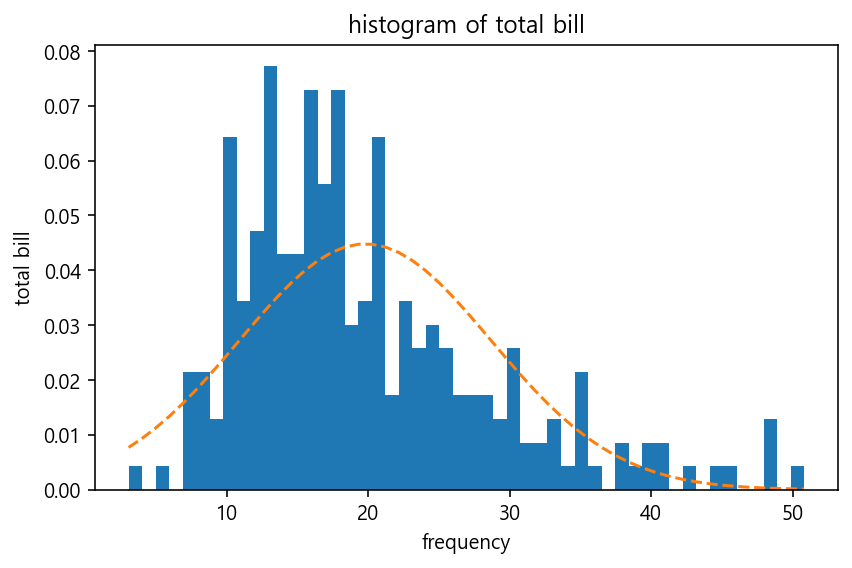

In [44]:
tips = pd.read_csv('tips.csv', encoding='utf-8')

fig, ax = plt.subplots()

x = tips['total_bill']

n, bins, patches = ax.hist(x, num_bins, density=True)
ax.set_title('histogram of total bill')
ax.set_xlabel('frequency')
ax.set_ylabel('total bill')

mu = x.mean()
sigma = x.std()
y = ((1 / (np.sqrt(2 * np.pi) *sigma))*np.exp(-0.5*(1/sigma*(bins-mu))**2))
ax.plot(bins, y, '--')
fig.tight_layout()

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

In [46]:
CHART_NAME = 'multiPlotExam'

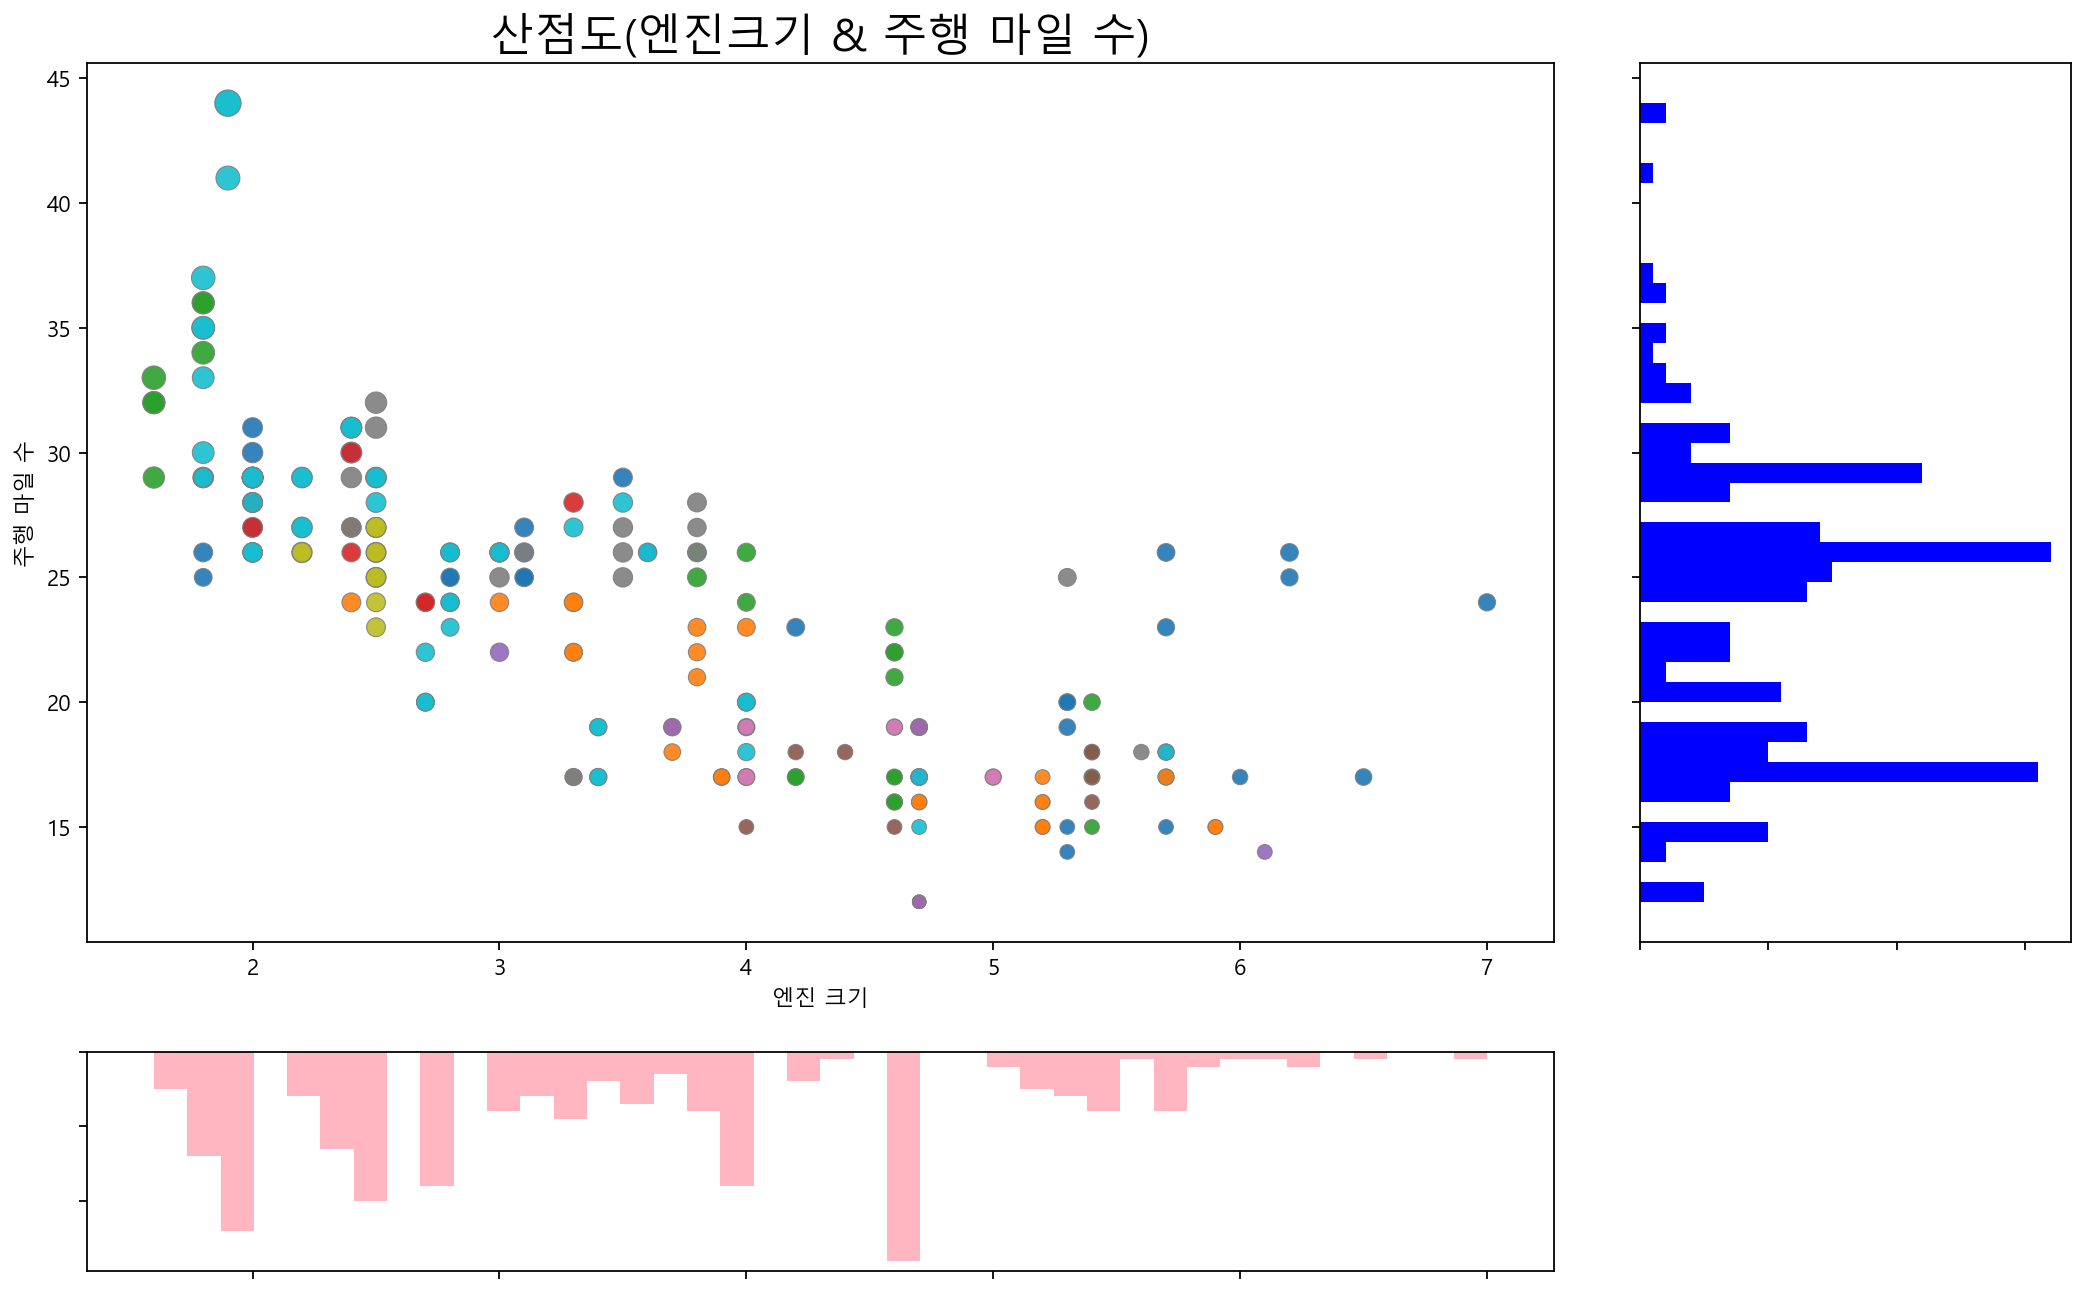

In [61]:
mpg = pd.read_csv('mpg.csv', encoding='utf-8')

fig = plt.figure(figsize=(16,10), dpi=80)
grid = plt.GridSpec(4,4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes,
               alpha=0.9, data=mpg, cmap='tab10', edgecolor='gray', linewidths=0.5)
ax_bottom.hist(mpg.displ, 40, histtype='bar', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='blue')

ax_main.set(title='산점도(엔진크기 & 주행 마일 수)', xlabel='엔진 크기', ylabel='주행 마일 수')
ax_main.title.set_fontsize(20)

cnt +=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)

In [63]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl

cnt, PNG, UNDERBAR = 0, '.png', '_'
# import warnings
# warnings.simplefilter(action='ignore', category='FutureWarnig')
CHART_NAME = 'seabornPlotExam'

In [133]:
welfare = pd.read_csv('welfare_python.csv', encoding='utf-8')
welfare.loc[welfare['gender'] == 1, ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2, ['gender']] = '여성'

thisyear = 2021
welfare['age'] = thisyear - welfare['birth'] +1

def setMarriage(x):
    if x == 1:
        return '결혼'
    elif x == 3:
        return '이혼'
    else:
        return '무응답'

welfare['marriage'] = welfare['marriage'].apply(setMarriage)

# print(sum(welfare['income'].isnull()))
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

def setReligion_txt(x):
    if int(x) == 1:
        return '있음'
    else:
        return '없음'
    
welfare['religion'] = welfare['religion'].apply(setReligion_txt)

In [134]:
jobFrame = pd.read_csv('welfare_job.csv', encoding='cp949')
welfare = pd.merge(welfare, jobFrame, on='code_job')

def setCR_txt(x):
    if int(x) == 1:
        return '서울'
    elif int(x) == 2:
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) == 4:
        return '대구/경북'
    elif int(x) == 5:
        return '대전/충남'
    elif int(x) == 6:
        return '강원/충북'
    elif int(x) == 7:
        return '광주/전남/전북/제주도'
    
welfare['code_religion'] = welfare['code_religion'].apply(setCR_txt)

def newAge(x):
    if x < 30:
        return '청년'
    elif x >=30 and x < 60:
        return '중년'
    else:
        return '노년'
welfare['ageg'] = welfare['age'].apply(newAge)

col_mapping = {'gender':'성별','birth':'생일','marriage':'결혼 유무','religion':'종교 유무',
               'code_job':'직업 코드','income':'소득','code_religion':'지역구',
               'age':'나이','job':'직업','ageg':'연령대'}
welfare = welfare.rename(columns=col_mapping)
welfare

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대
0,남성,1948,무응답,없음,942.0,120.000000,서울,74,경비원 및 검표원,노년
1,남성,1945,이혼,없음,942.0,220.200000,서울,77,경비원 및 검표원,노년
2,남성,1946,결혼,없음,942.0,139.000000,서울,76,경비원 및 검표원,노년
3,남성,1953,결혼,없음,942.0,150.000000,서울,69,경비원 및 검표원,노년
4,남성,1960,결혼,있음,942.0,166.000000,서울,62,경비원 및 검표원,노년
...,...,...,...,...,...,...,...,...,...,...
7524,여성,1950,결혼,있음,819.0,241.619016,강원/충북,72,기타 식품가공관련 기계조작원,노년
7525,남성,1960,결혼,있음,111.0,250.000000,광주/전남/전북/제주도,62,의회의원 고위공무원 및 공공단체임원,노년
7526,남성,1960,결혼,없음,111.0,1250.000000,서울,62,의회의원 고위공무원 및 공공단체임원,노년
7527,남성,1992,무응답,있음,876.0,280.000000,부산/경남/울산,30,선박 갑판승무원 및 관련 종사원,중년


In [135]:
welfare.to_csv('welfareClean.csv',index=False, encoding='cp949')

In [136]:
def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)

In [137]:
welfare=pd.read_csv('welfareClean.csv', encoding='cp949')
welfare

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대
0,남성,1948,무응답,없음,942.0,120.000000,서울,74,경비원 및 검표원,노년
1,남성,1945,이혼,없음,942.0,220.200000,서울,77,경비원 및 검표원,노년
2,남성,1946,결혼,없음,942.0,139.000000,서울,76,경비원 및 검표원,노년
3,남성,1953,결혼,없음,942.0,150.000000,서울,69,경비원 및 검표원,노년
4,남성,1960,결혼,있음,942.0,166.000000,서울,62,경비원 및 검표원,노년
...,...,...,...,...,...,...,...,...,...,...
7524,여성,1950,결혼,있음,819.0,241.619016,강원/충북,72,기타 식품가공관련 기계조작원,노년
7525,남성,1960,결혼,있음,111.0,250.000000,광주/전남/전북/제주도,62,의회의원 고위공무원 및 공공단체임원,노년
7526,남성,1960,결혼,없음,111.0,1250.000000,서울,62,의회의원 고위공무원 및 공공단체임원,노년
7527,남성,1992,무응답,있음,876.0,280.000000,부산/경남/울산,30,선박 갑판승무원 및 관련 종사원,중년


In [138]:
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
result

결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64

<AxesSubplot:xlabel='결혼 유무', ylabel='count'>

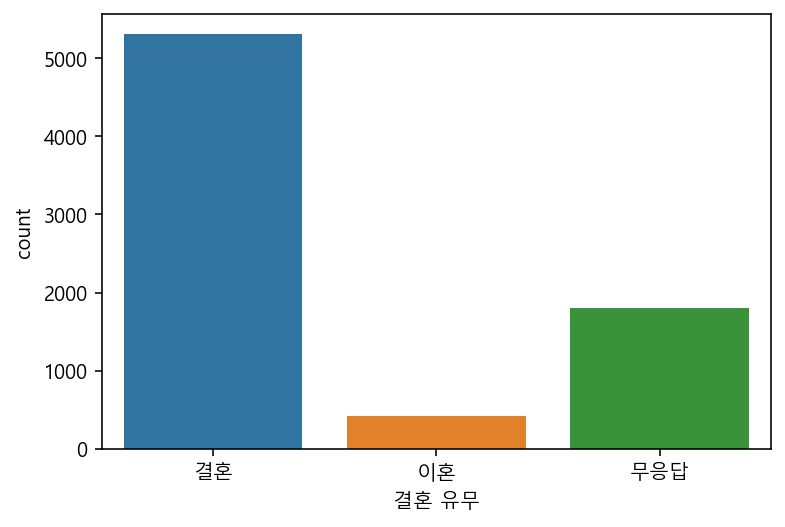

In [139]:
import seaborn as sns
sns.countplot(x='결혼 유무', data=welfare, order=['결혼', '이혼', '무응답'])

In [140]:
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
result

결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        932
       있음        871
이혼     없음        247
       있음        172
Name: 결혼 유무, dtype: int64

<AxesSubplot:title={'center':'결혼 유무 & 종교 유무 빈도'}, xlabel='count', ylabel='결혼 유무'>

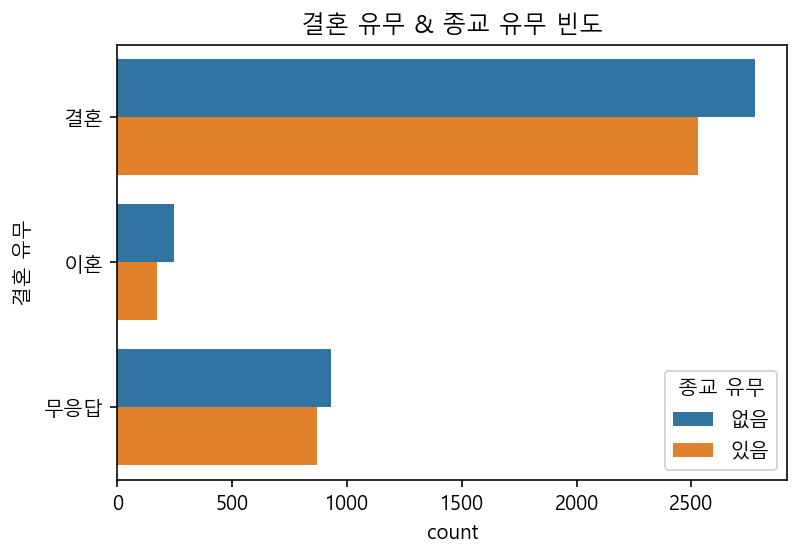

In [141]:
plt.figure()
plt.title('결혼 유무 & 종교 유무 빈도')
sns.countplot(y='결혼 유무', data=welfare, hue='종교 유무', order=['결혼', '이혼', '무응답'])

<AxesSubplot:title={'center':'결혼 유무 & 종교 유무 빈도'}, xlabel='결혼 유무', ylabel='count'>

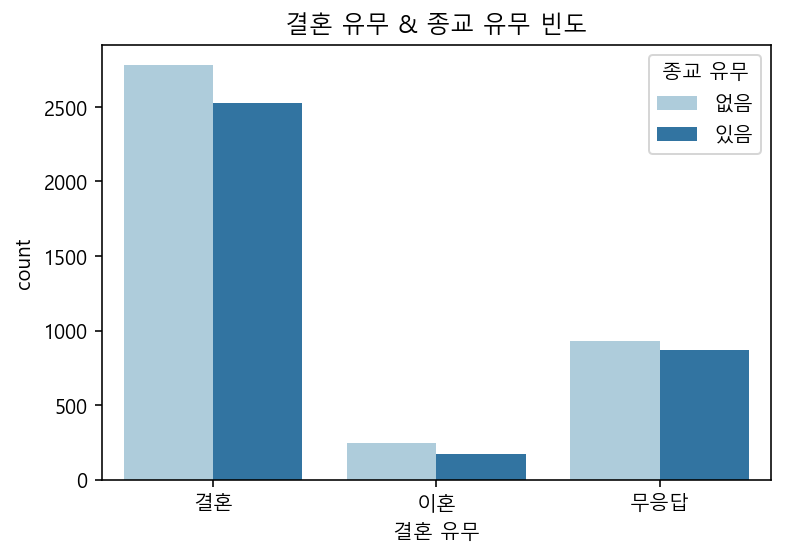

In [142]:
plt.title('결혼 유무 & 종교 유무 빈도')
sns.countplot(x='결혼 유무', data=welfare, hue='종교 유무', order=['결혼', '이혼', '무응답'], palette='Paired')

c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='나이'>

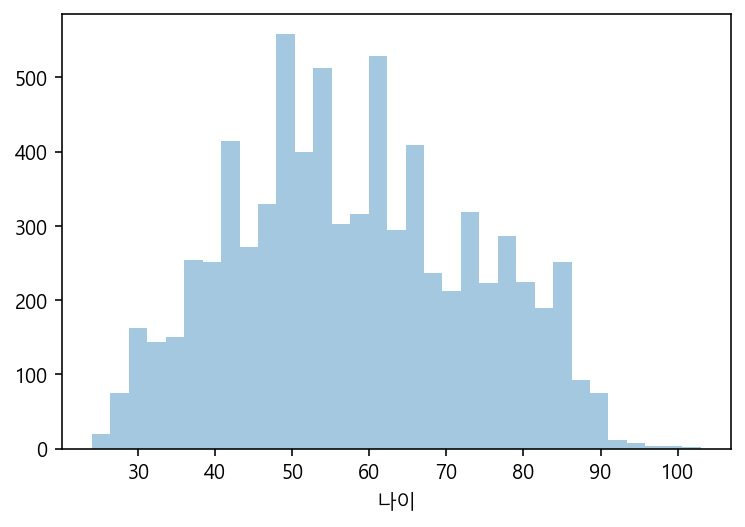

In [143]:
x= welfare['나이']
plt.figure()
sns.distplot(x, hist=True, kde=False)

c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='나이', ylabel='Density'>

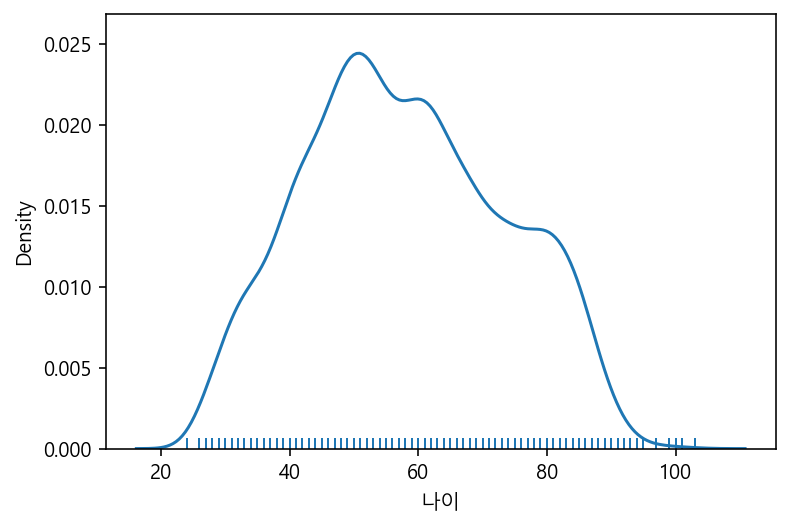

In [144]:
x= welfare['나이']
plt.figure()
sns.distplot(x, hist=False, kde=True, rug=True)

c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='나이', ylabel='Density'>

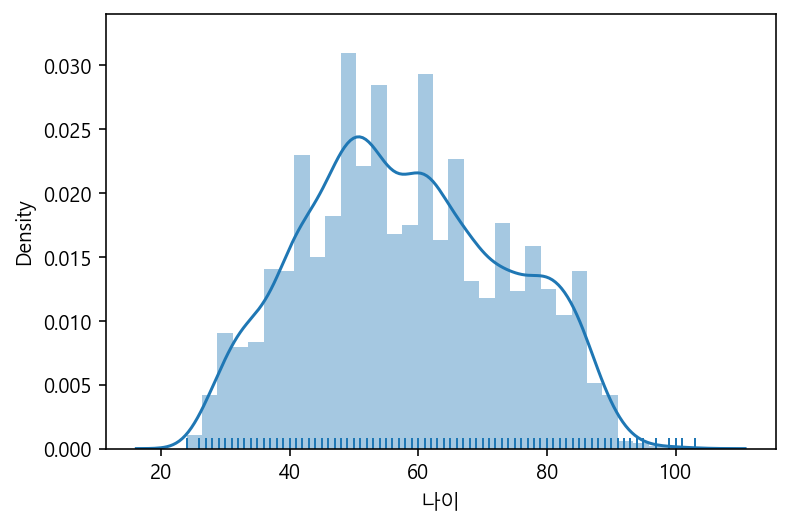

In [145]:
plt.figure()
sns.distplot(x, hist=True, kde=True, rug=True)

c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\seonghee.choi\anaconda3\envs\edu\lib\site-packages\seaborn\distributions.py:2112: FutureWarning: Usin

<AxesSubplot:xlabel='Density', ylabel='나이'>

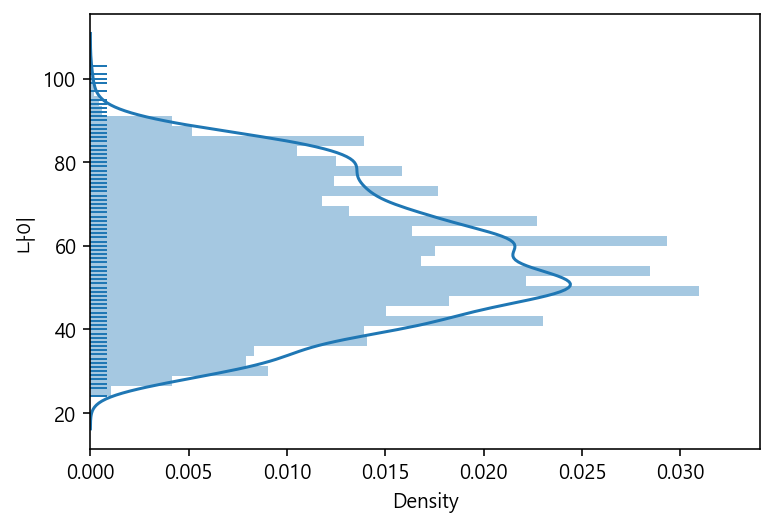

In [146]:
plt.figure()
sns.distplot(x, hist=True, kde=True, rug=True, vertical=True)

<AxesSubplot:xlabel='결혼 유무', ylabel='성별'>

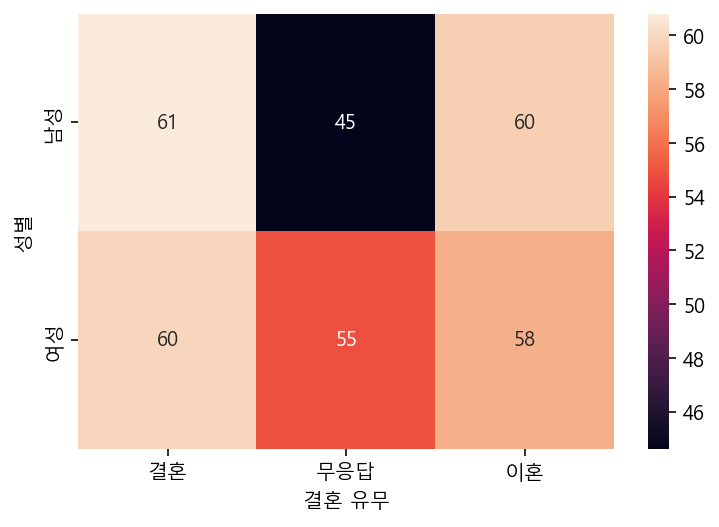

In [147]:
pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
plt.figure()
sns.heatmap(data=pivot, annot=True)

<AxesSubplot:>

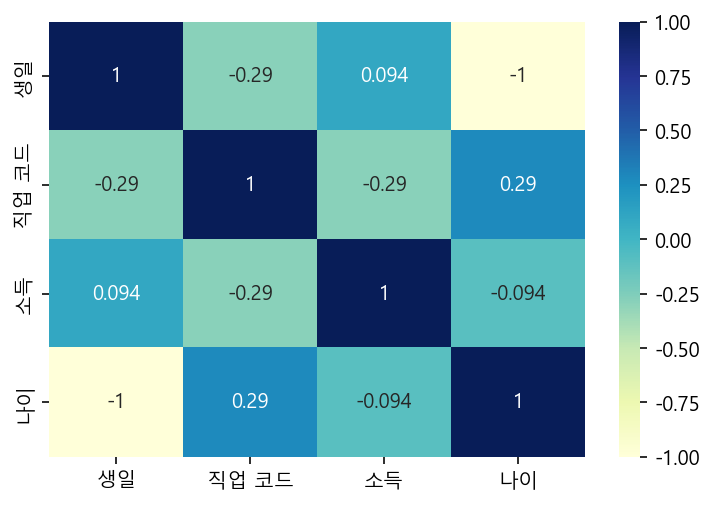

In [149]:
cor = welfare.corr()
plt.figure()
sns.heatmap(data=cor, annot=True, cmap='YlGnBu')

<Figure size 432x288 with 0 Axes>

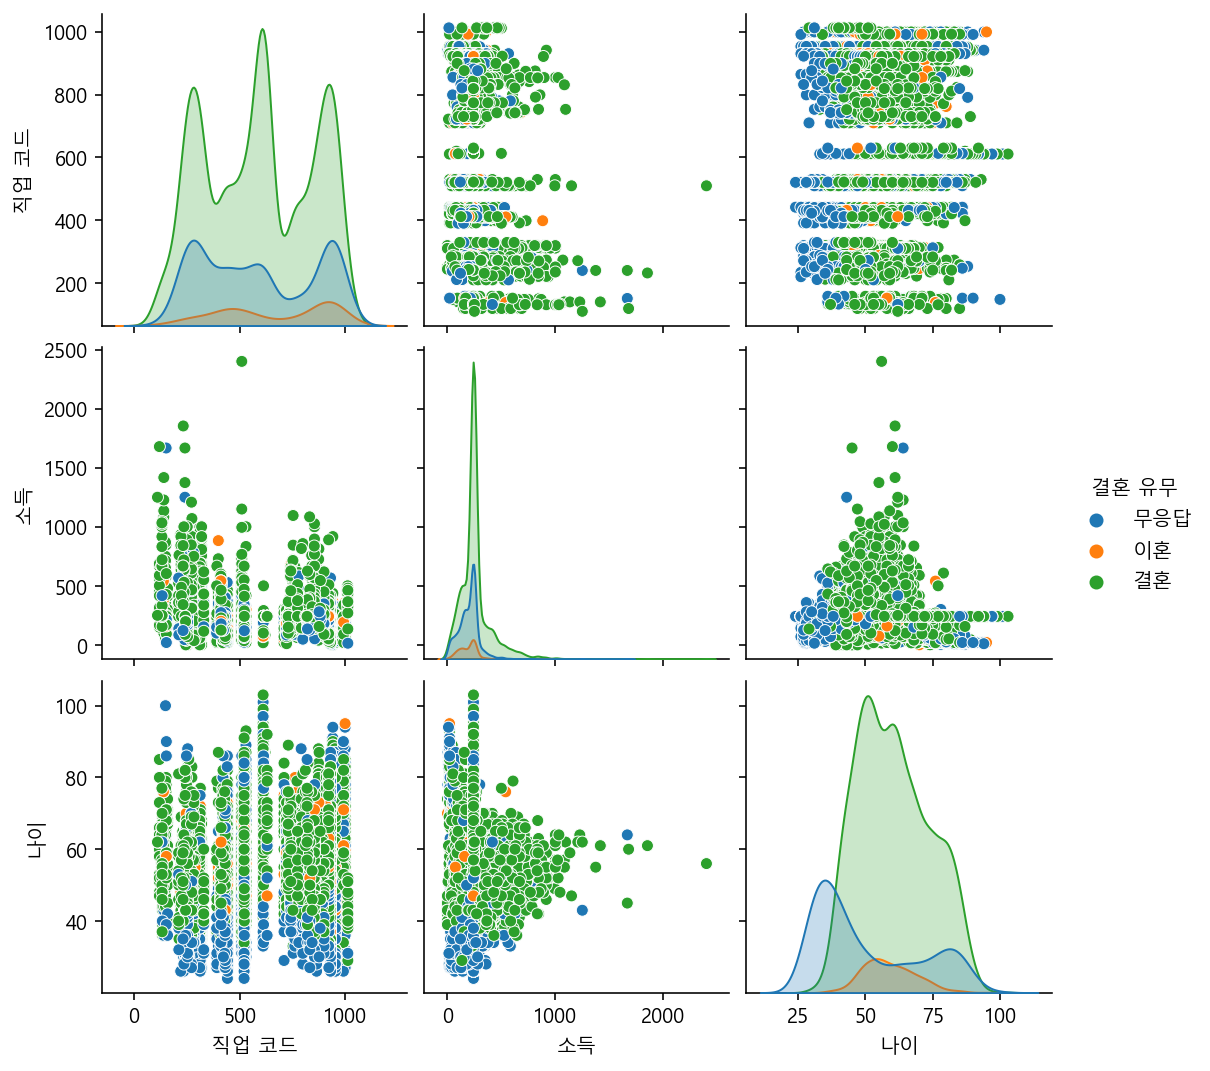

In [154]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

plt.figure()
sns.pairplot(data=newwelfare, hue='결혼 유무')

<Figure size 432x288 with 0 Axes>

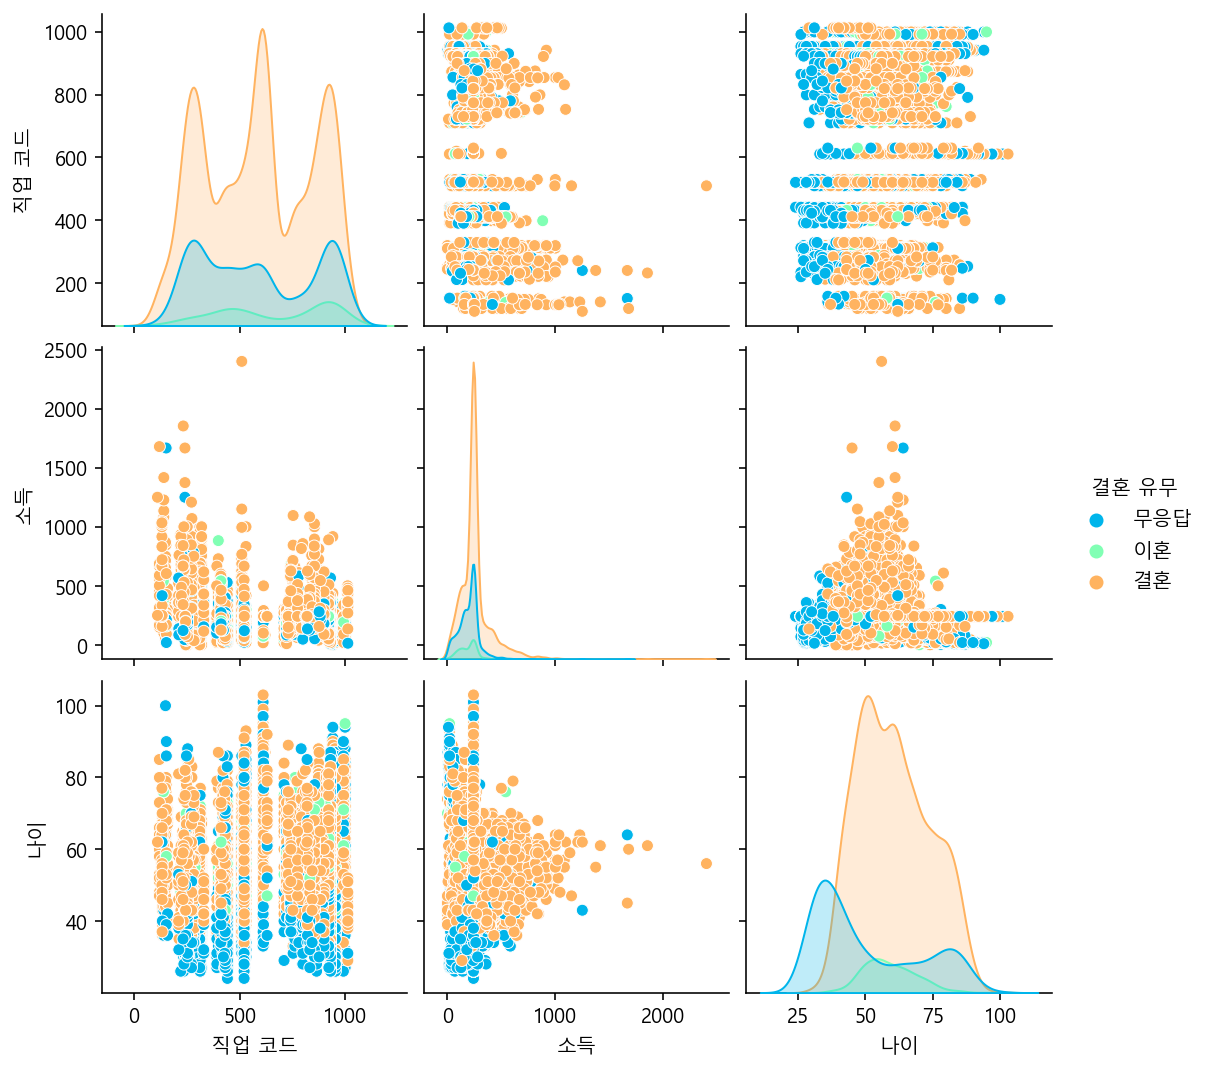

In [155]:
plt.figure()
sns.pairplot(data=newwelfare, hue='결혼 유무', palette='rainbow')

<AxesSubplot:xlabel='나이'>

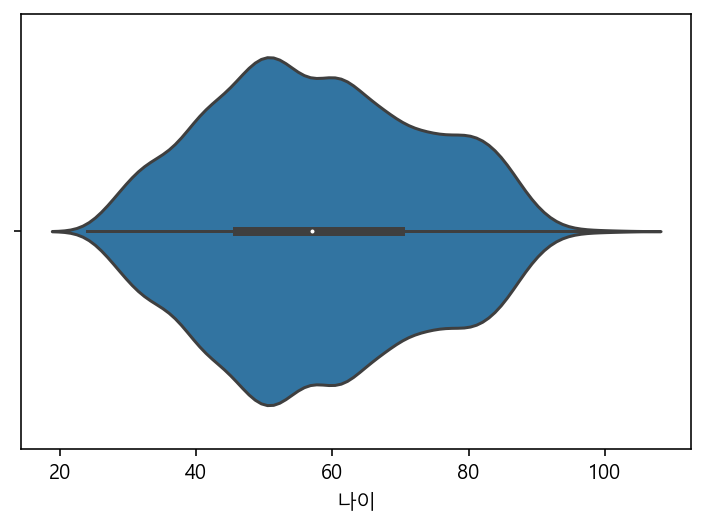

In [156]:
plt.figure()
sns.violinplot(x='나이', data=welfare)

<AxesSubplot:xlabel='성별', ylabel='나이'>

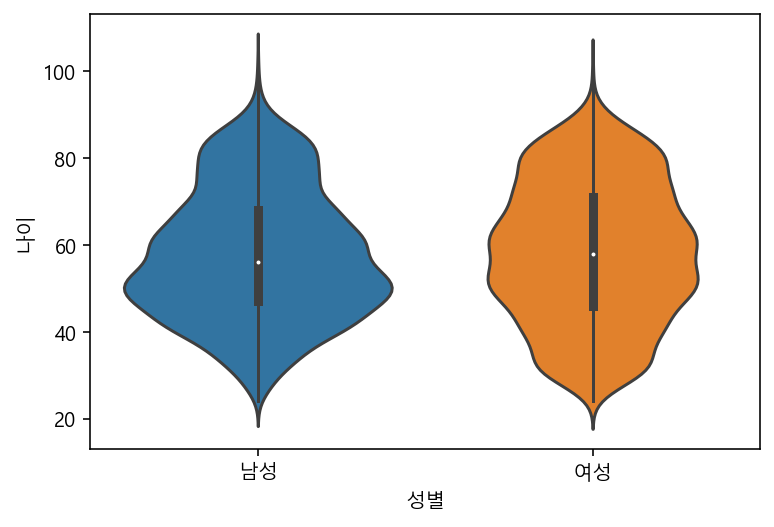

In [157]:
plt.figure()
sns.violinplot(x='성별', y='나이', data=welfare)

<AxesSubplot:xlabel='종교 유무', ylabel='나이'>

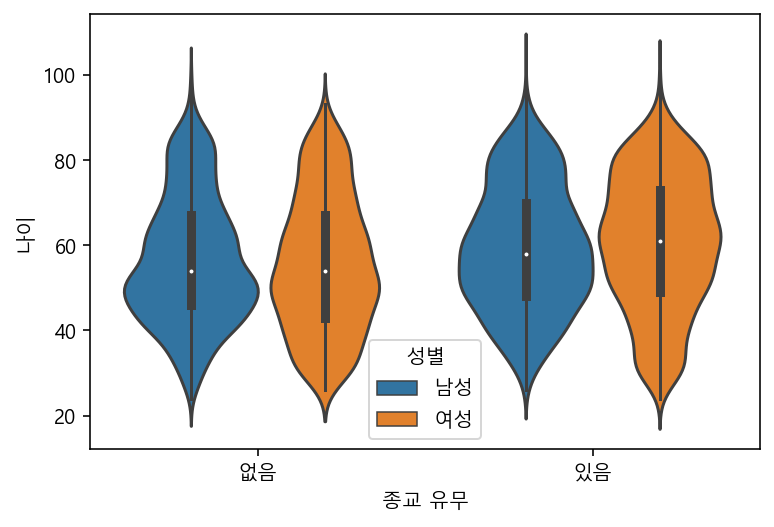

In [159]:
plt.figure()
sns.violinplot(x='종교 유무', y='나이', hue='성별', data=welfare)

<Figure size 432x288 with 0 Axes>

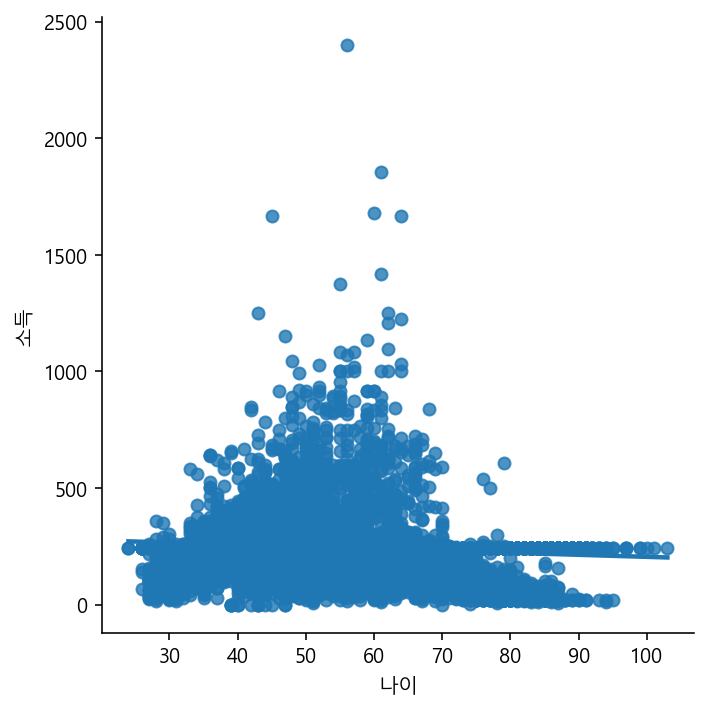

In [163]:
plt.figure()
sns.lmplot(x='나이', y='소득',data=welfare)

<Figure size 432x288 with 0 Axes>

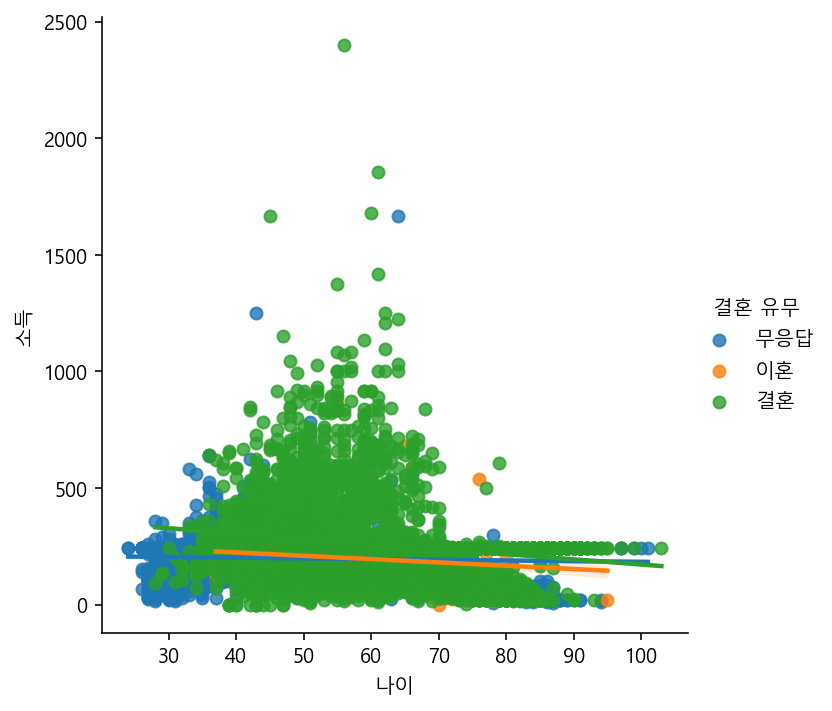

In [164]:
plt.figure()
sns.lmplot(x='나이', y='소득', hue='결혼 유무',data=welfare)

<Figure size 432x288 with 0 Axes>

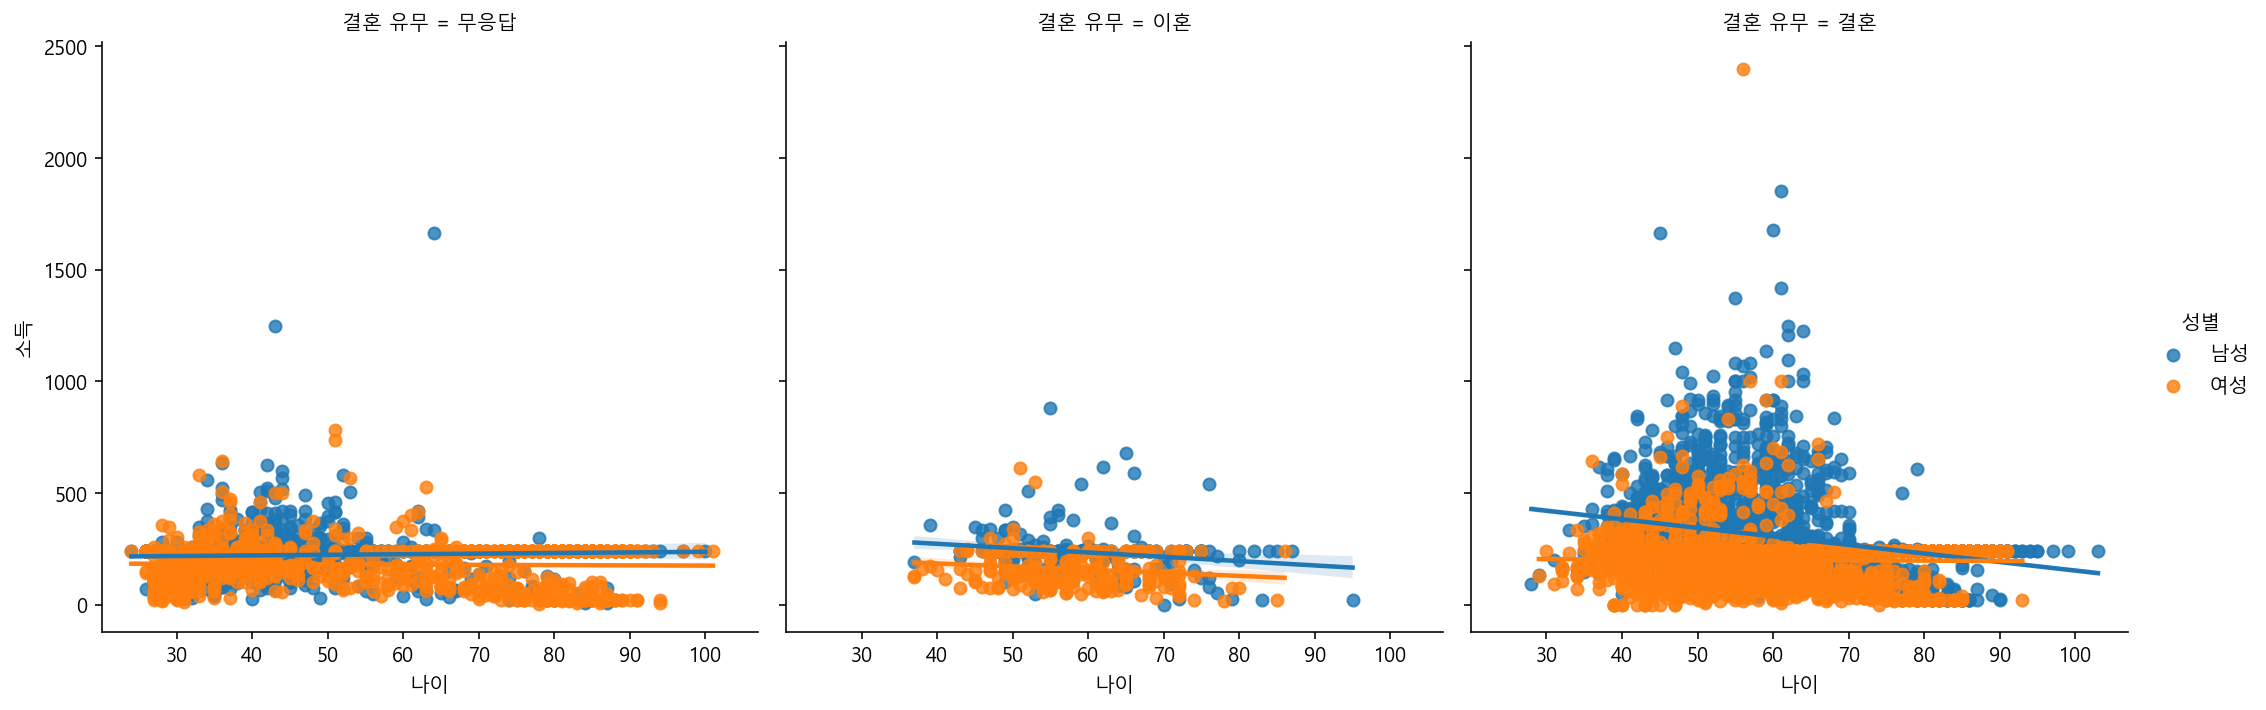

In [165]:
plt.figure()
sns.lmplot(x='나이', y='소득', hue='성별',col='결혼 유무',data=welfare)

<Figure size 432x288 with 0 Axes>

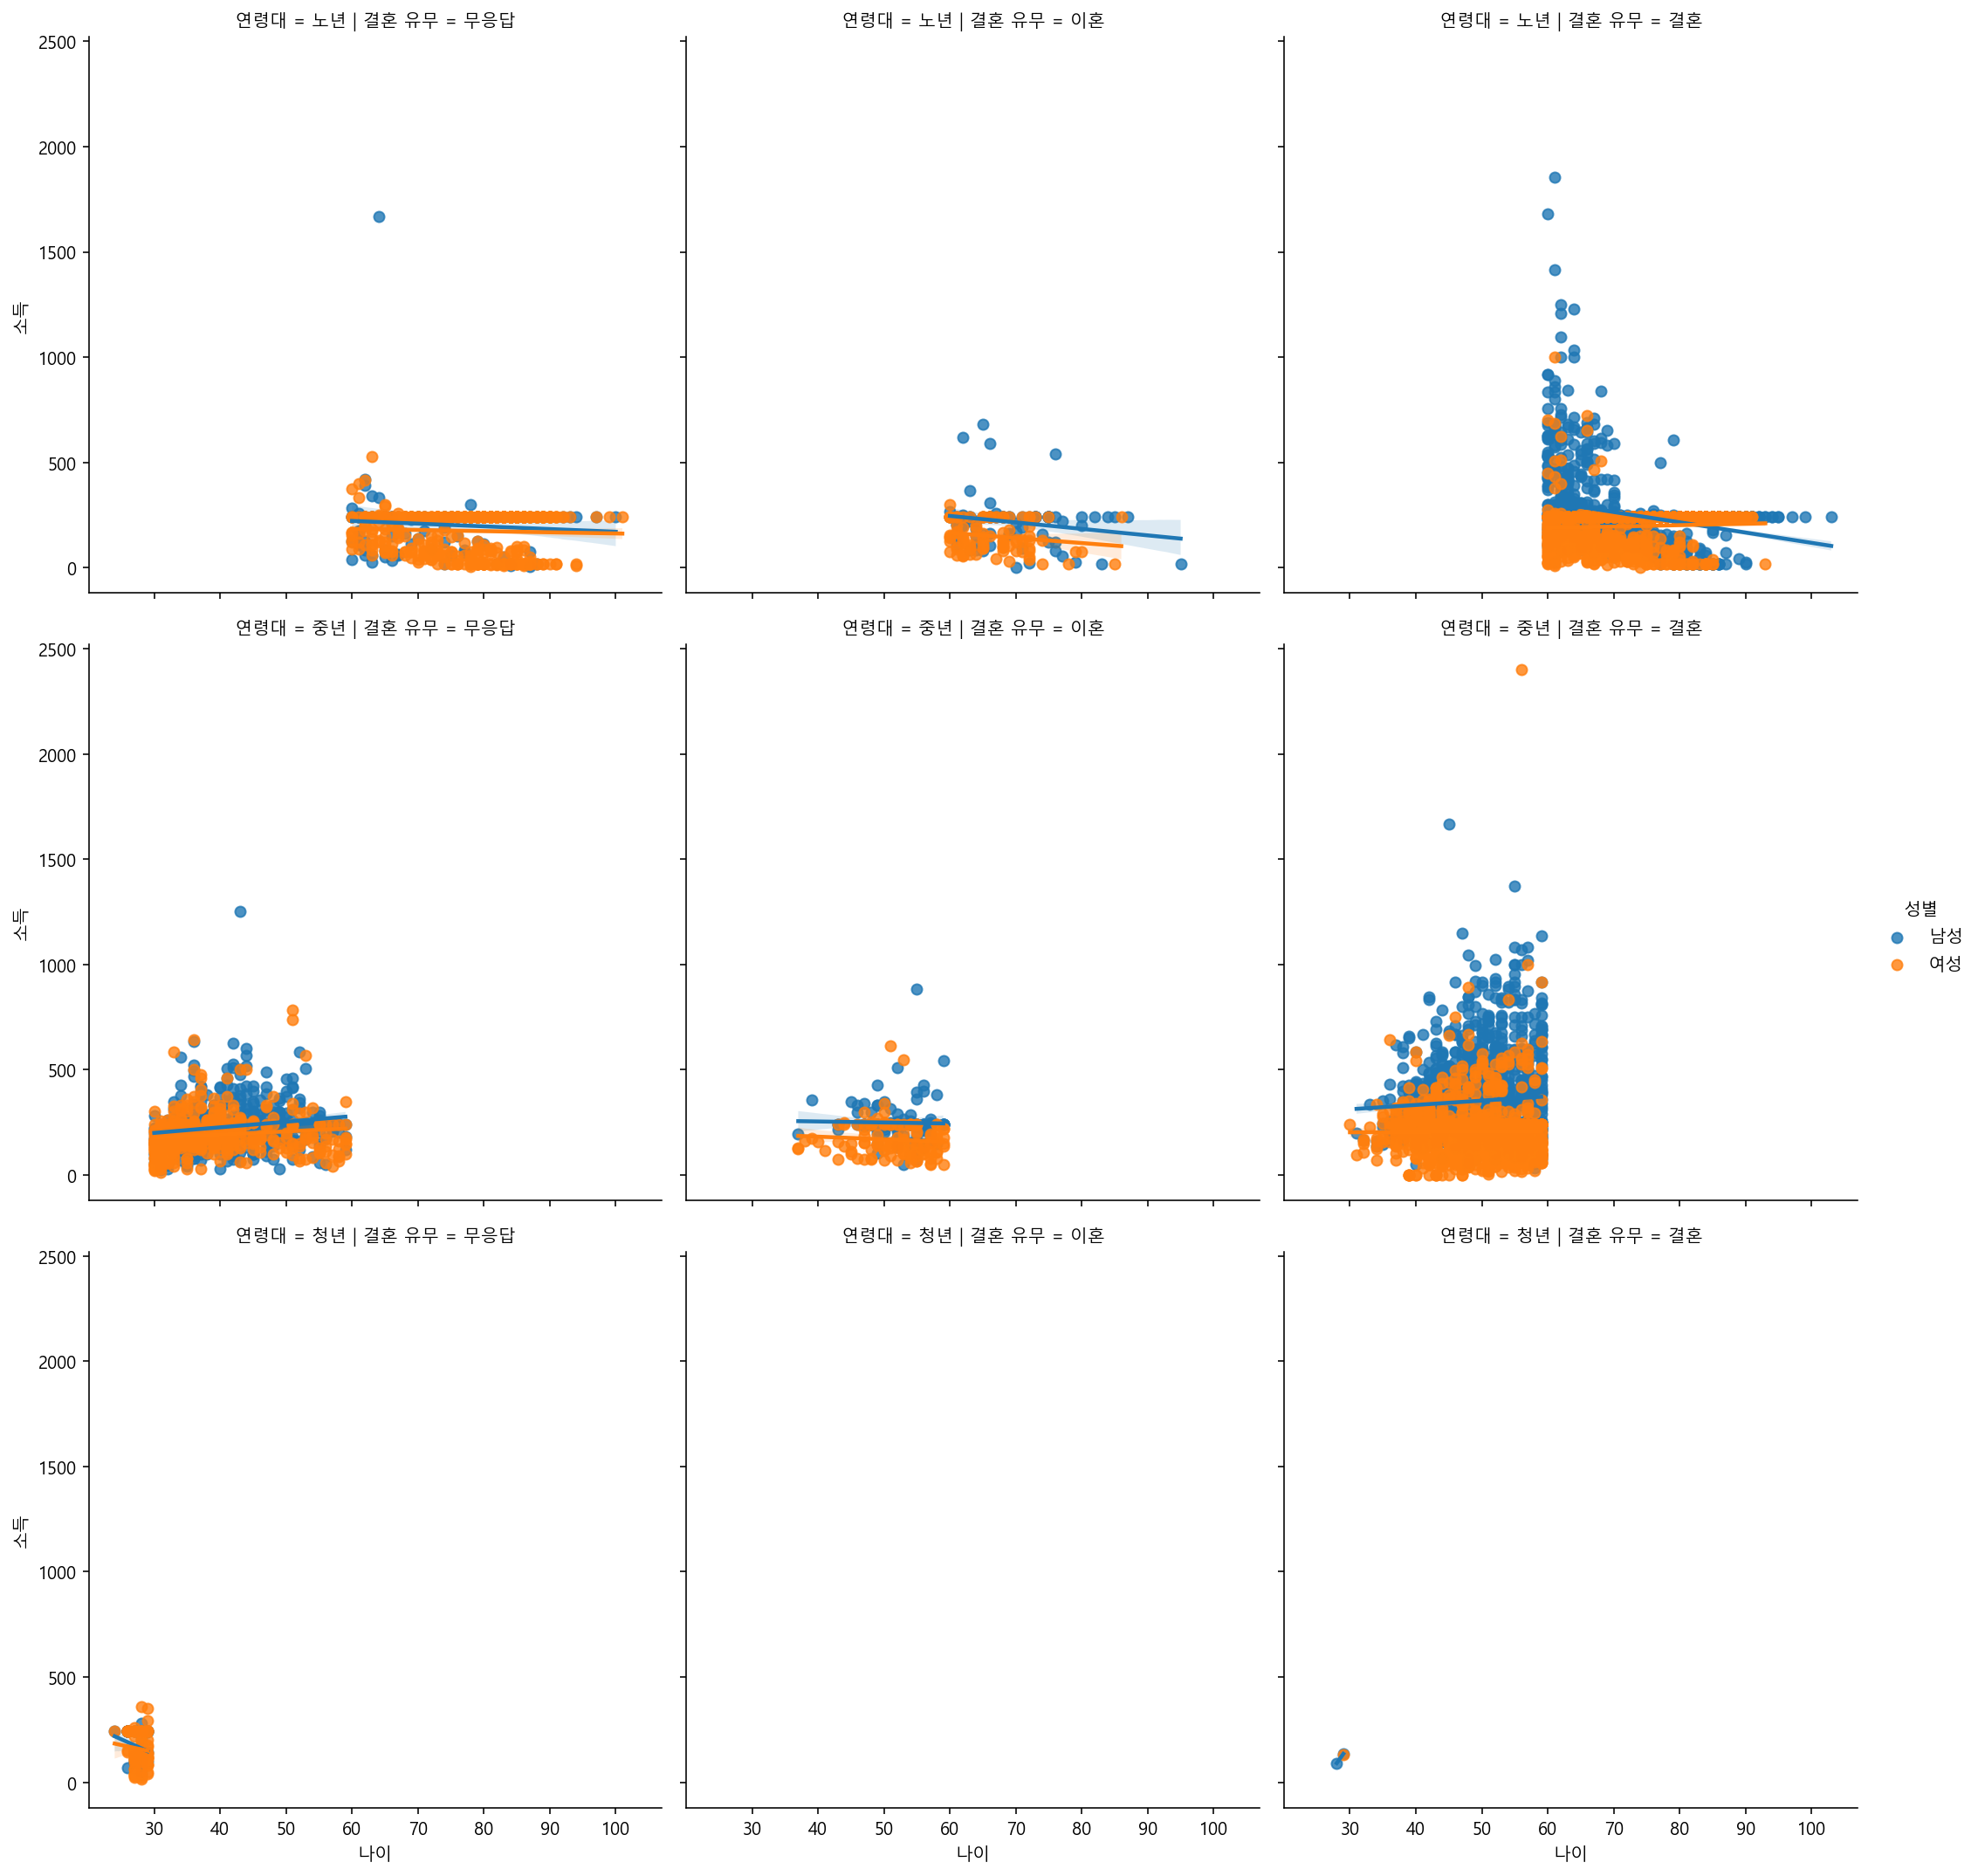

In [166]:
plt.figure()
sns.lmplot(x='나이', y='소득', hue='성별',col='결혼 유무', row='연령대',data=welfare)

<Figure size 432x288 with 0 Axes>

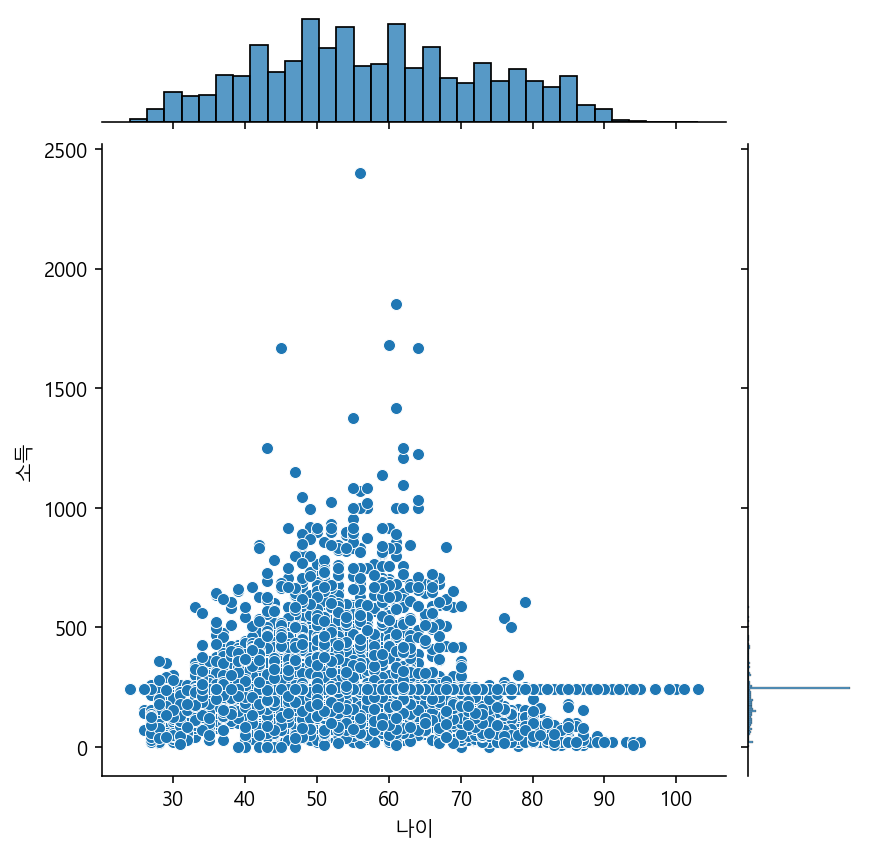

In [167]:
plt.figure()
sns.jointplot(x='나이', y='소득', data=welfare)

<Figure size 432x288 with 0 Axes>

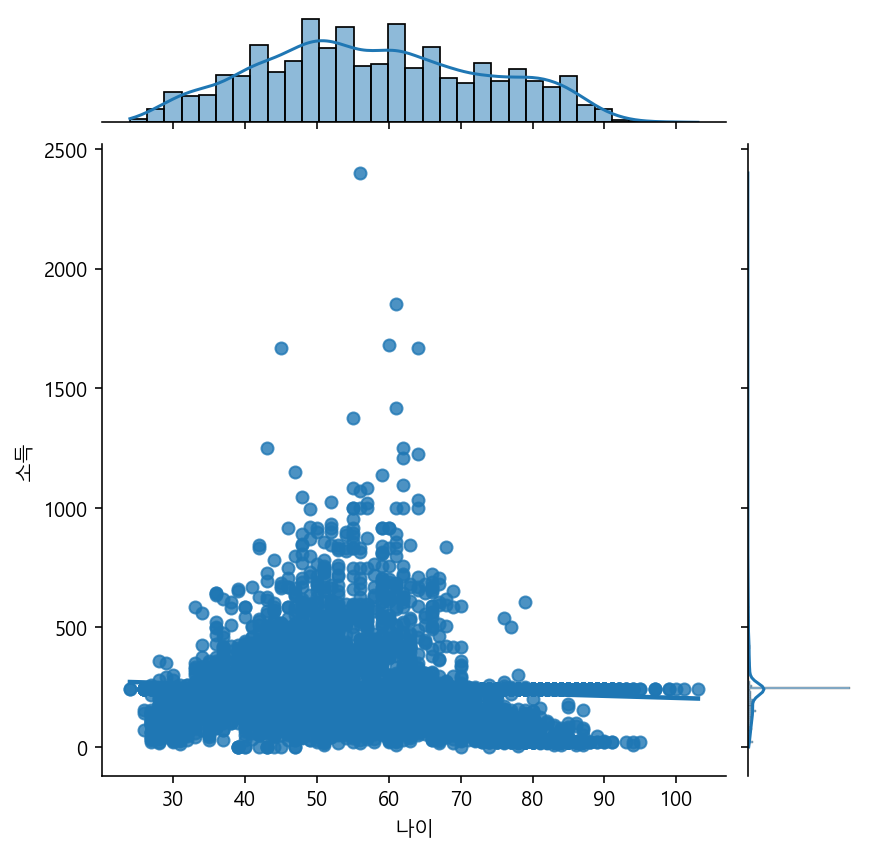

In [168]:
plt.figure()
sns.jointplot(x='나이', y='소득', data=welfare, kind='reg')

<Figure size 432x288 with 0 Axes>

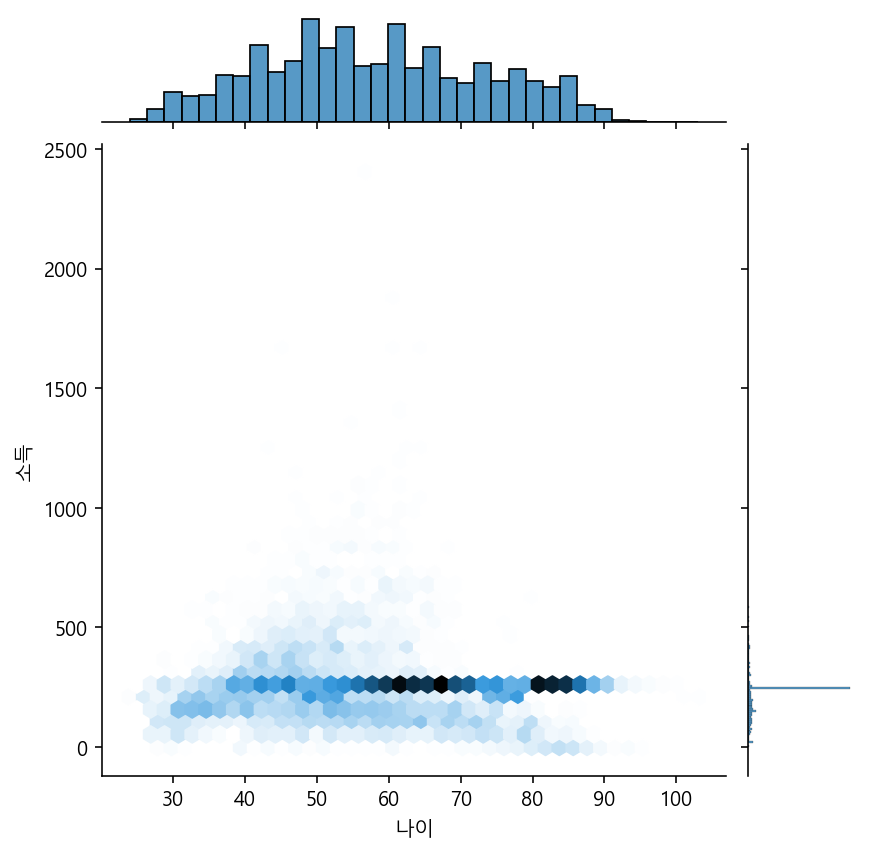

In [169]:
plt.figure()
sns.jointplot(x='나이', y='소득', data=welfare, kind='hex')

<Figure size 432x288 with 0 Axes>

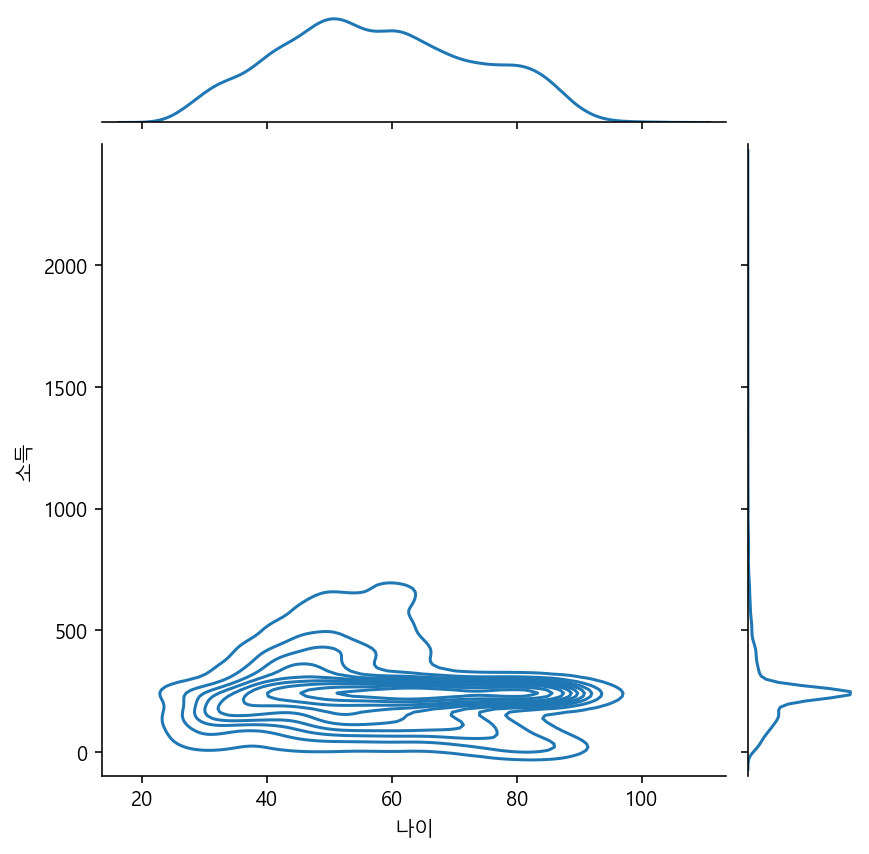

In [170]:
plt.figure()
sns.jointplot(x='나이', y='소득', data=welfare, kind='kde')

In [174]:
CHART_NAME='slopeChart'

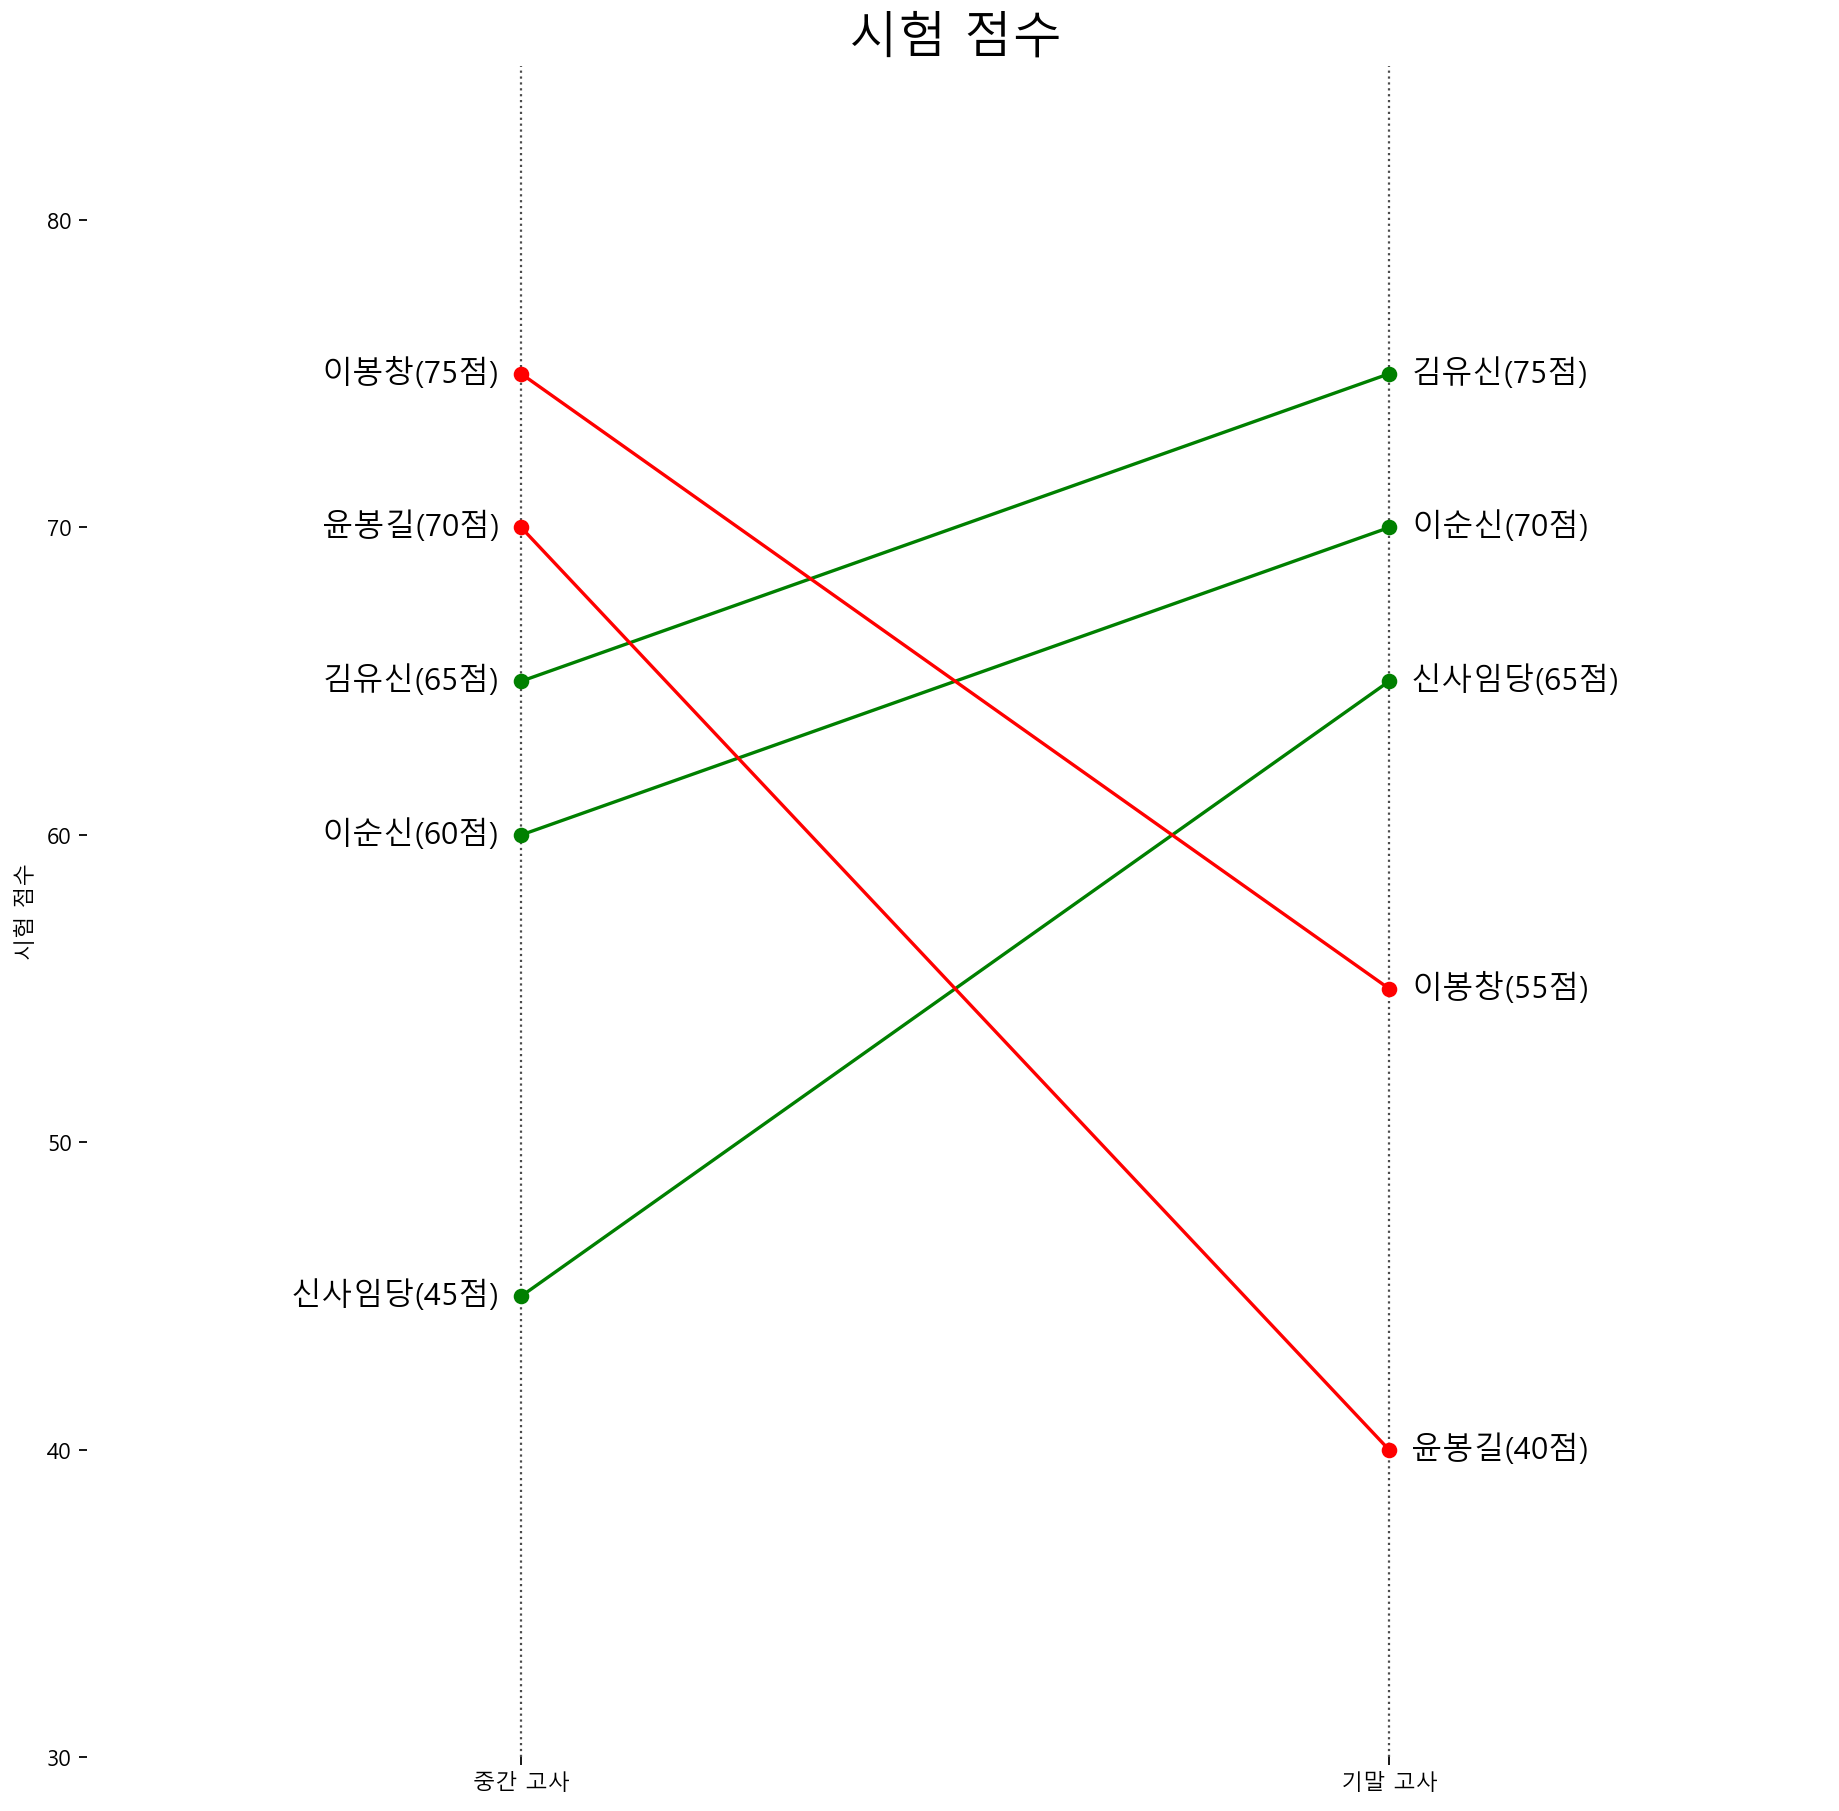

In [187]:
CHART_NAME='slopeShart'

df = pd.read_csv('exam2.csv', encoding='cp949')

fig, ax = plt.subplots(1,1, figsize=(14,14), dpi=80)

HUNDRED = 80
MIN_HEIGHT = 30
MAX_HEIGHT = HUNDRED + 5

ax.vlines(x=1, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, 
          linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, 
          linewidth=1, linestyles='dotted')

ax.scatter(y=df['midexam'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['finalexam'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

left_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['midexam'])]
right_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['finalexam'])]

import matplotlib.lines as mlines
idx = 0

def newline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]],[p1[1], p2[1]], color='red' if p1[1] - p2[1]>0 else 'green',
                     marker='o', markersize=6)
    ax.add_line(l)
for p1, p2 in zip(df['midexam'], df['finalexam']):
    newline([1,p1], [3, p2])
    ax.text(1-0.05, p1, left_label[idx], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, right_label[idx], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    idx += 1
    
ax.set_title('시험 점수',fontdict={'size': 22})
ax.set(xlim=(0,4), ylim=(MIN_HEIGHT, MAX_HEIGHT), ylabel='시험 점수')

ax.set_xticks([1,3])
ax.set_xticklabels(['중간 고사', '기말 고사'])

plt.gca().spines['top'].set_alpha(.0)
plt.gca().spines['bottom'].set_alpha(.0)
plt.gca().spines['left'].set_alpha(.0)
plt.gca().spines['right'].set_alpha(.0)